In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19

Forecasted number of infected(next 10 days):
[ 246.63007056  309.36469854  387.66249067  485.38434618  607.34897362
  759.57050345  949.5550476  1186.67082915 1482.61013365 1851.96586093
 2312.95110759]


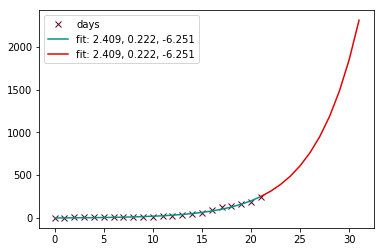

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os
import pandas as pd


info_path = "/Users/alexsisu/work_phd/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports"

all_data = []
all_files = []
for csv_file in os.listdir(info_path):
    if not csv_file.strip().endswith(".csv"): continue
    all_files.append(csv_file)

all_files = sorted(all_files)
for csv_file in all_files:
    if not csv_file.strip().endswith(".csv"): continue
    full_path = os.path.join(info_path, csv_file)
    df = pd.read_csv(full_path)
    df = df[(df["Country/Region"] == "Romania")]
    df = df[["Confirmed"]]
#    print(df["Confirmed"].values)
    if (len(df)):
        all_data.append(df["Confirmed"].values[0])

#print(all_data)
all_data.append(246) # number of infected from 18 March
plt.show()



def func_exp(x, a, b, c):
    return a * np.exp(b * x) + c


def exponential_regression(x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0=(0, 0.01, 10))
#    print(popt)
    plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label="days")

    inferred = func_exp(x_data, *popt)
    plt.plot(x_data, inferred, color='xkcd:teal',
                   label="fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))

    future = np.arange(len(x_data)-1,len(x_data)+10)
    inferred2 = func_exp(future, *popt)
    print("Forecasted number of infected(next 10 days):")
    print(inferred2)
    plt.plot(future, inferred2, color='xkcd:red',
                   label="fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))

    plt.legend()
    plt.show()



x_data = np.arange(0, len(all_data))
y_data = np.array(all_data)
exponential_regression(x_data, y_data)
